In [ ]:
!pip install kagglehub

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Importazione del Dataset

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prosperchuks/health-dataset")

print("Path to dataset folder:", path)


Path to dataset folder: /kaggle/input/health-dataset


# Descrizione del Problema

Il Dataset in questione contiene una serie di informazioni utili per predire se una persona è a rischio di diabete o meno.
Le informazioni riguardano sia lo stato attuale di salute di una persona sia della sua storia clinica.

I dati di questo dataset sono relative allo stato di 70'500 pazienti.
L'obiettivo del progetto è quello di predire una variabile discreta binaria.

In [4]:
df = pd.read_csv(os.path.join(path, "diabetes_data.csv"))

# Data Exploration

In [ ]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


Nel dataset ci sono 18 colonne di cui 17 features e 1 target.

Le <u>17 features</u> sono:

1. `Age` | Objective Feature | Int
2. `Sex` | Objective Feature | Int
3. `HighChol` | Examination Feature | Binary | Int
4. `CholCheck` | Examination Feature | Binary | Int
5. `BMI` | Examination Feature | Float
6. `Smoker` | Subjective Feature | Binary | Int
7. `HeartDiseaseorAttack` | Examination Feature | Binary | Int
8. `PhysActivity` | Subjective Feature | Binary | Int
9. `Fruits` | Subjective Feature | Binary | Int
10. `Veggies` | Subjective Feature | Binary | Int
11. `HvyAlcoholConsump` | Subjective Feature | Binary | Int
12. `GenHlth` | Subjective Feature | Int
13. `MentHlth` | Subjective Feature | Int
14. `PhysHlth` | Subjective Feature | Int
15. `DiffWalk` | Subjective Feature | Binary | Int
16. `Stroke` | Examination Feature | Binary | Int
17. `HighBP` | Examination Feature | Binary | Int

La variabile target è `Diabetes` ed è binaria (Int), vale `0` se la persona NON ha il diabete, `1` altrimenti.

Nel dataset ci sono sia features **Categoriche** che **Continue**.

Le features **Categoriche** sono:

`Age`, `Sex`, `HighChol`, `CholCheck`, `Smoker`, `HeartDiseaseorAttack`, `PhysActivity`, `Fruits`, `Veggies`, `HvyAlcoholConsump`, `DiffWalk`, `Stroke`, `HighBP`

Quelle **Continue** sono:
`BMI`, `GenHlth`, `MentHlth`, `PhysHlth`


Osservo la descrizione del dataset per rilevare la media, il valore massimo, minimo, deviazione standard, i percentili di ogni features:

In [ ]:
df.drop("Diabetes", axis=1).describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000


Studio la variabile target `diabetes` :

<Axes: ylabel='count'>

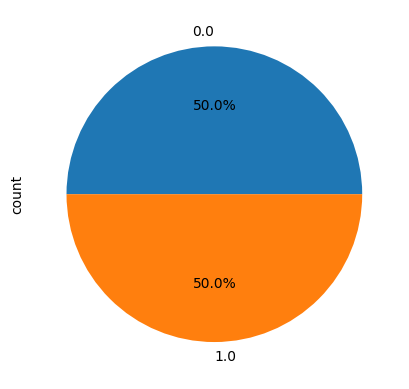

In [ ]:
df['Diabetes'].value_counts().plot.pie(autopct='%1.1f%%')

Osserviamo dal grafico a torta che la variabile target `Diabetes` risulta essere bilanciata, cioè il numero di istanze per le due classi sono pressoche' identiche.  Il problema in esame risulta quindi essere bilanciato; non e' necessario utilizzare tecniche di bilanciamento delle classi come per esempio `smoothing`.

### Rilevazione di valori nulli

Si rilevano valori nulli nel datset, sempre che siano presenti

In [ ]:
df.isna().sum()

,0
Age,0
Sex,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0
Veggies,0


Nel dataset non sono presenti valori nulli.

Verifico che tutte le persone presenti nel dataset abbiano un genere valido (Male o Female).

In [ ]:
df.groupby('Sex').count()

,Age,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
Sex,,,,,,,,,,,,,,,,,
0.0,38386,38386,38386,38386,38386,38386,38386,38386,38386,38386,38386,38386,38386,38386,38386,38386,38386
1.0,32306,32306,32306,32306,32306,32306,32306,32306,32306,32306,32306,32306,32306,32306,32306,32306,32306


Dove con `1` si intendono le persone di genere `maschile`, mentre con `0` il genere `femminile`.

In [ ]:
df.groupby('Sex')['Diabetes'].value_counts()

Sex  Diabetes
0.0  0.0         19975
     1.0         18411
1.0  1.0         16935
     0.0         15371
Name: count, dtype: int64

## Correlazioni fra le varie features

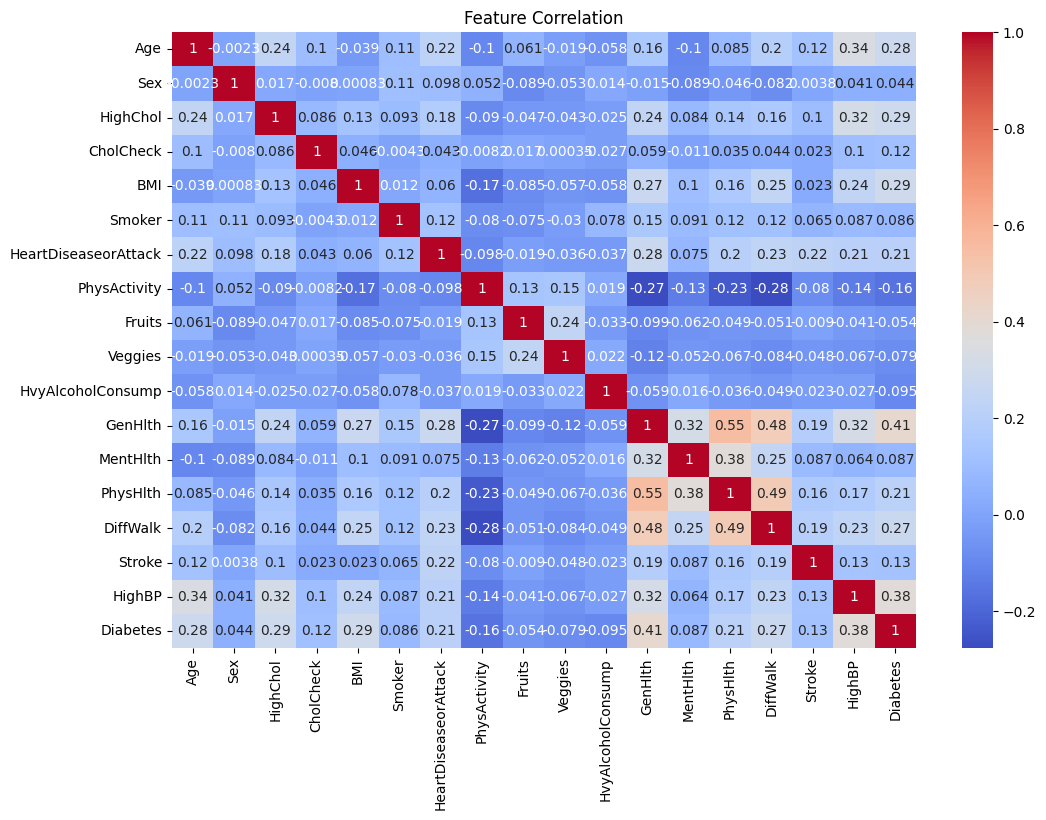

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

Questa matrice di correlazione ci fa vedere “a colpo d’occhio” quanto ciascuna coppia di variabili numeriche tende a variare insieme, su una scala da -1 (perfetta correlazione negativa) a +1 (perfetta correlazione positiva).

Le feature più correlate con il diabete sono GenHlth (+0,41), HighBP (+0,38), BMI (+0,29), HighChol (+0,29), Age (+0,28) e DiffWalk (+0,27).


Osservo la correlazione fra diabete e genere della persona nel dataset:

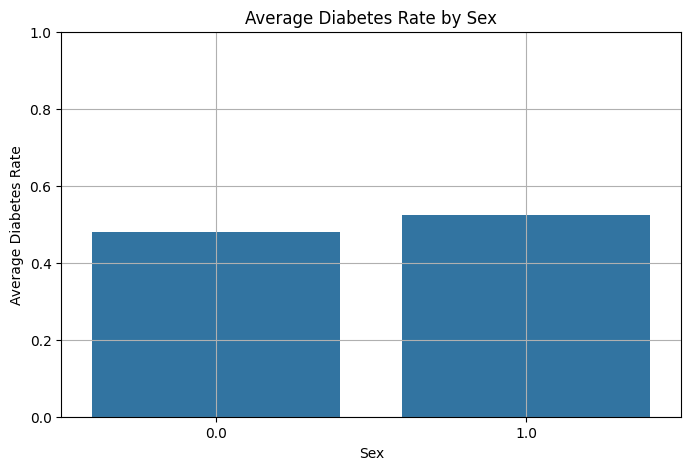

In [ ]:
diabetes_by_sex = df.groupby('Sex')['Diabetes'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Diabetes', data=diabetes_by_sex)
plt.title('Average Diabetes Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Diabetes Rate')
plt.ylim(0, 1)
plt.grid()
plt.show()

Da questo grafico vediamo che le persone con diabete in questo dataset sono leggermente più uomini che donne, ma la differenza non è molta.

Visualizzo le distribuzioni di tutte le variabili continue del dataset.

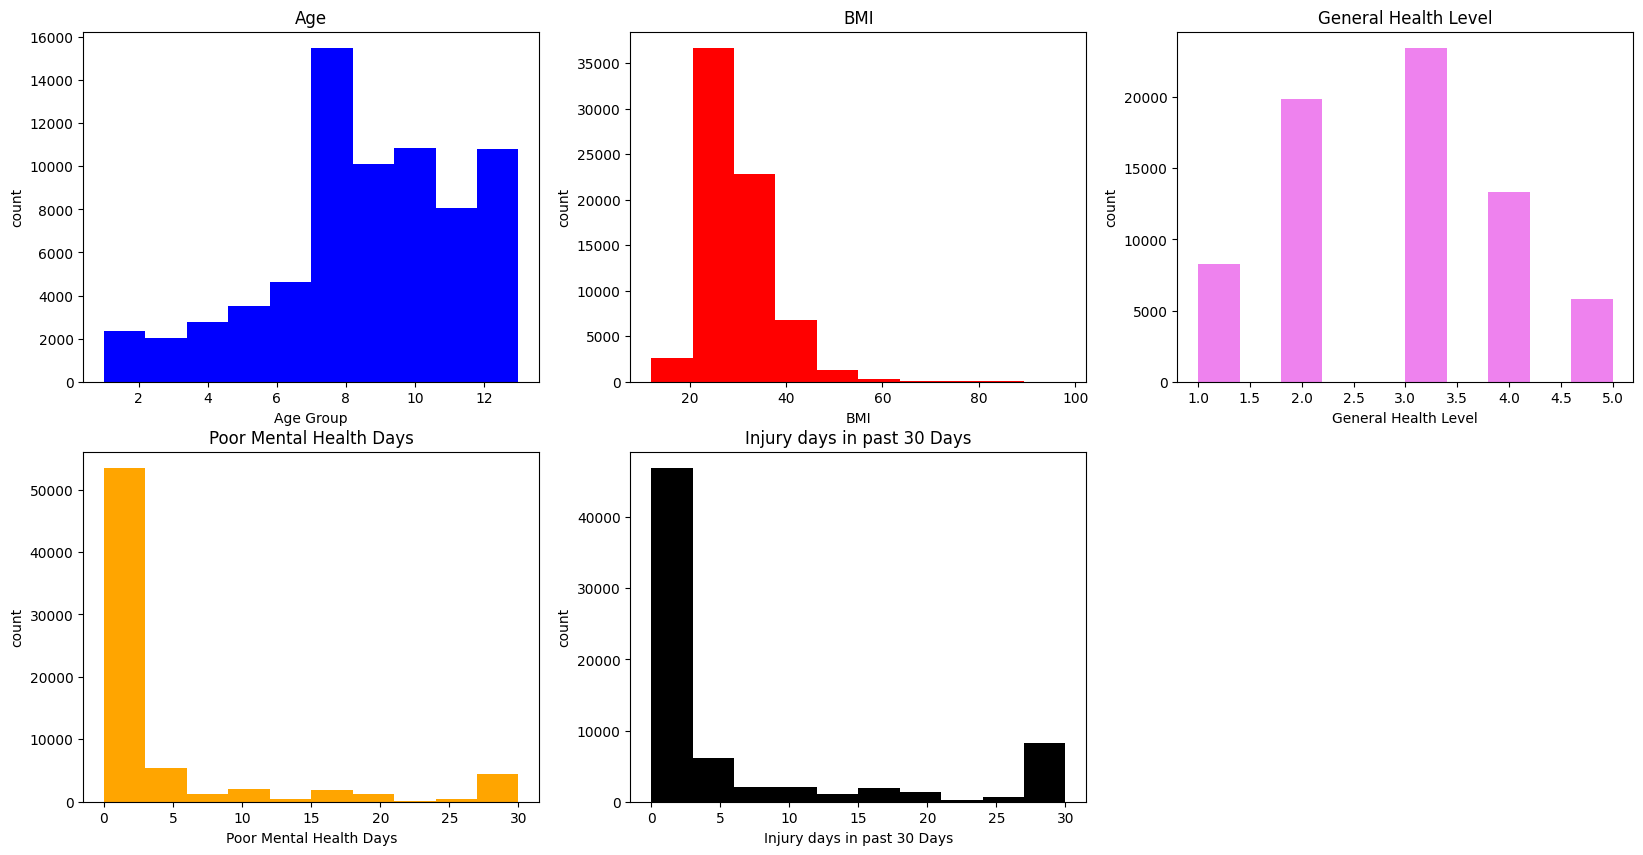

In [9]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.title('Age')
plt.hist(df['Age'], label="age", color='blue')
plt.ylabel('count')
plt.xlabel('Age Group')

plt.subplot(2, 3, 2)
plt.title('BMI')
plt.hist(df['BMI'], label="bmi", color='red')
plt.ylabel('count')
plt.xlabel('BMI')

plt.subplot(2, 3, 3)
plt.title('General Health Level')
plt.hist(df['GenHlth'], label="General Health Level", color='violet')
plt.ylabel('count')
plt.xlabel('General Health Level')

plt.subplot(2, 3, 4)
plt.title('Poor Mental Health Days')
plt.hist(df['MentHlth'], label="Poor Mental Health Days", color='orange')
plt.ylabel('count')
plt.xlabel('Poor Mental Health Days')

plt.subplot(2, 3, 5)
plt.title('Injury days in past 30 Days')
plt.hist(df['PhysHlth'], label="Injury days in past 30d", color='black')
plt.ylabel('count')
plt.xlabel('Injury days in past 30 Days')

plt.show()


Gli istogrammi rivelano che il campione è composto principalmente da persone di mezza età, con pochi giovani e un po' più di anziani, e che il BMI tende a concentrarsi attorno a valori di sovrappeso (25–30), pur mostrando alcuni outlier estremi. L’autovalutazione della salute generale si colloca nella fascia media (soprattutto “buono/discreto”), mentre i giorni di cattiva salute mentale e di infortunio negli ultimi 30 giorni sono caratterizzati da un’abbondanza di zero o di piccoli numeri e da una coda lunga di pochi individui con valori elevati.


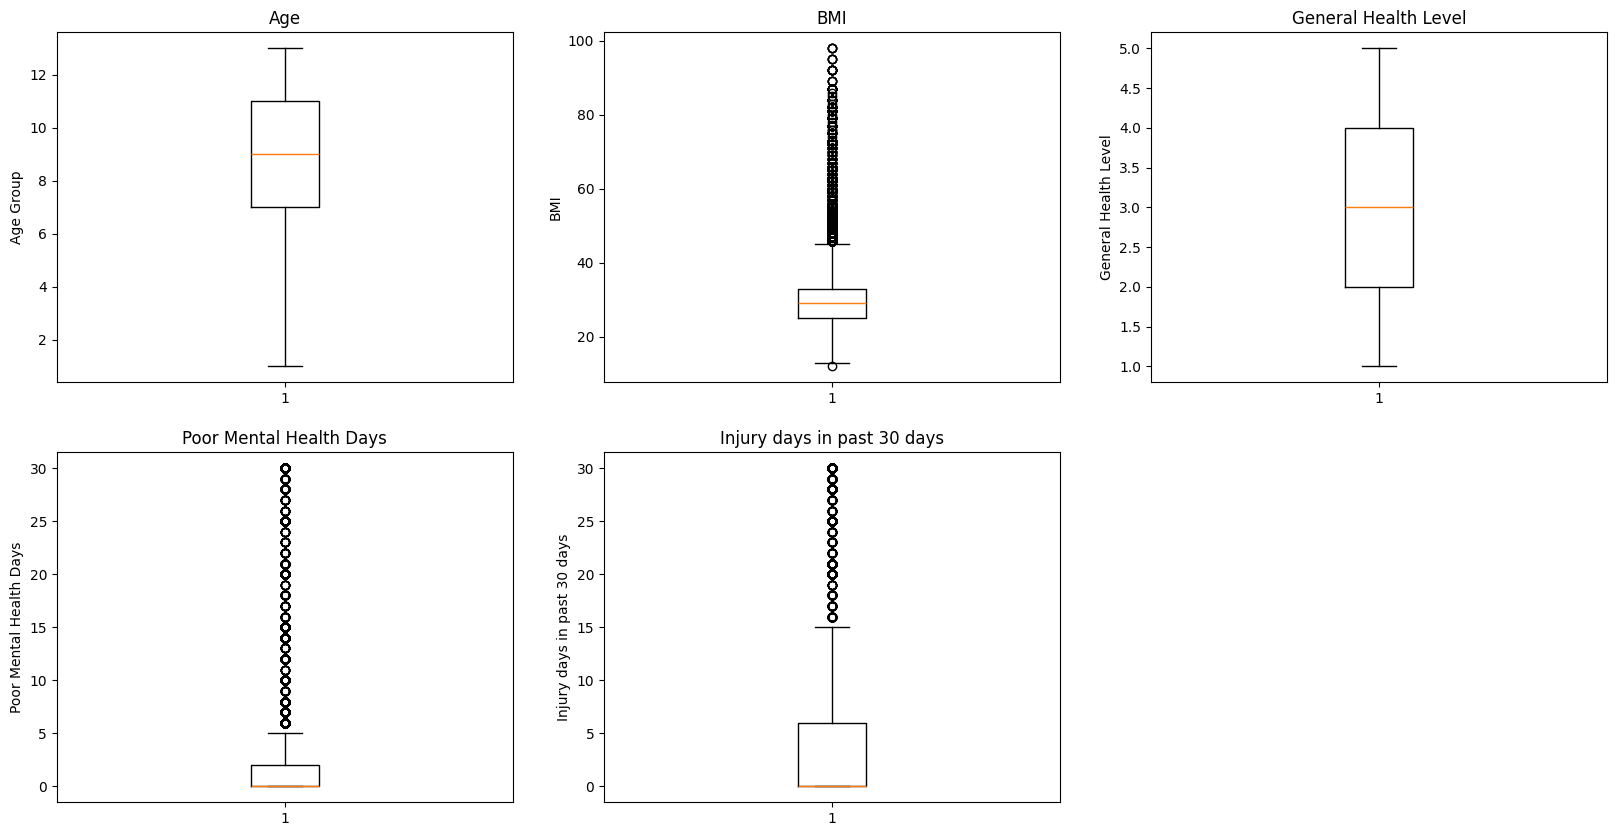

In [10]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.title('Age')
plt.boxplot(df['Age'])
plt.ylabel('Age Group')

plt.subplot(2, 3, 2)
plt.title('BMI')
plt.boxplot(df['BMI'])
plt.ylabel('BMI')

plt.subplot(2, 3, 3)
plt.title('General Health Level')
plt.boxplot(df['GenHlth'])
plt.ylabel('General Health Level')

plt.subplot(2, 3, 4)
plt.title('Poor Mental Health Days')
plt.boxplot(df['MentHlth'])
plt.ylabel('Poor Mental Health Days')

plt.subplot(2, 3, 5)
plt.title('Injury days in past 30 days')
plt.boxplot(df['PhysHlth'])
plt.ylabel('Injury days in past 30 days')

plt.show()


Da questi box-plot capiamo che l’età si distribuisce abbastanza uniformemente attorno al valore mediano (intorno a 9 anni nella scala usata), con punte minime intorno a 1 e massime vicino al 13, ma senza escursioni estreme. Il BMI mostra invece una forte asimmetria verso l’alto: la mediana si colloca sui valori normopeso (intorno a 28), ma compaiono numerosi soggetti con indici molto elevati, fino a quasi 100, che emergono chiaramente come outlier. Il livello di salute percepita tende a concentrarsi sul valore centrale (3), con pochi individui che si dichiarano in condizioni molto scarse (5) o eccellenti (1). Per quanto riguarda i giorni di cattivo benessere mentale e i giorni con problemi fisici o infortuni, la maggior parte delle persone segnala zero giorni, e solo poche registrano valori elevati (fino a 30), il che evidenzia una distribuzione fortemente sbilanciata e la presenza di sporadici casi di disagio prolungato. In sintesi, oltre a una variabilità moderata di età e salute autoreportata, il BMI e soprattutto la cattiva salute (mentale o da infortunio) mostrano code di distribuzione molto lunghe, indicando che una minoranza di individui soffre di condizioni particolarmente critiche.


## Relazione tra Features

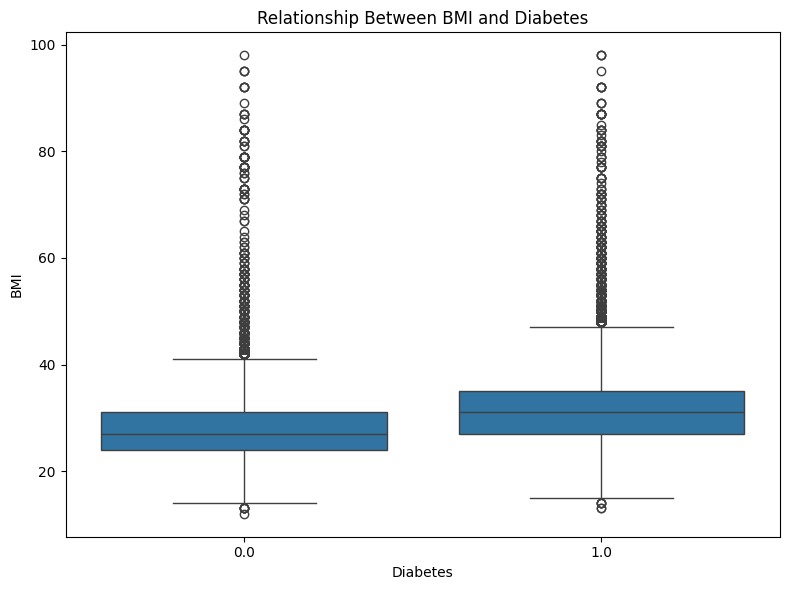

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diabetes', y='BMI', data=df)
plt.title('Relationship Between BMI and Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()


Il grafico mostra che chi ha il diabete (valore 1) tende ad avere un BMI mediamente più alto e una variabilità maggiore, con quartili e mediana superiori rispetto a chi non ne soffre (valore 0), che presenta un BMI più basso e distribuito in modo più compatto.


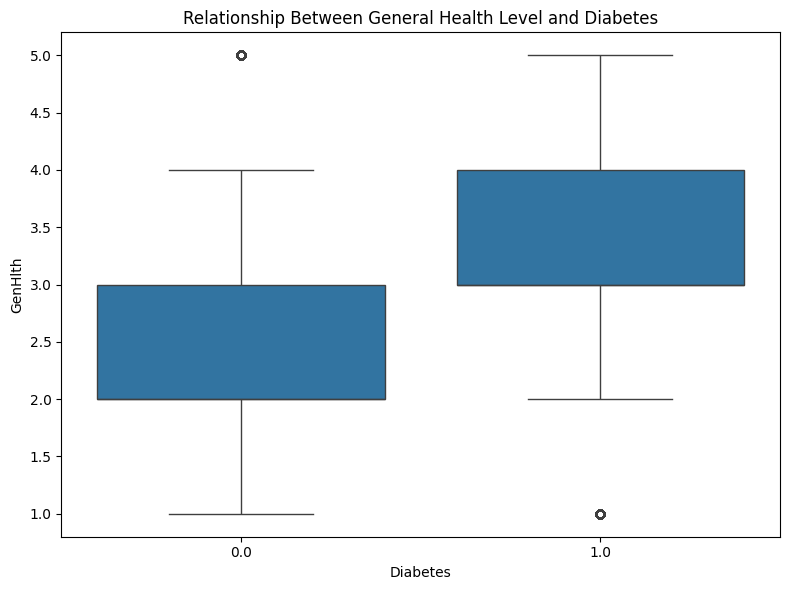

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diabetes', y='GenHlth', data=df)
plt.title('Relationship Between General Health Level and Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('GenHlth')
plt.tight_layout()
plt.show()


Il grafico mette a confronto l’autovalutazione dello stato di salute generale (“GenHealth”), su una scala da 1 (eccellente) a 5 (pessimo), tra chi non ha il diabete e chi ne è affetto. È evidente che chi convive con il diabete segnala mediamente condizioni di salute peggiori: la mediana per il gruppo diabetico si colloca intorno a 4 (corrispondente a “fair/poor”), mentre per i non diabetici sta intorno a 2 (“very good”). Inoltre, l’intervallo interquartile dei diabetici (circa 3-4) è più ristretto in alto, ma le code arrivano fino a 5, indicando una maggiore frequenza di giudizi estremi sul pessimo stato di salute. Al contrario, i non diabetici mostrano una distribuzione più compatta verso i valori bassi (1-3), con pochi outlier che riportano un pessimo stato. In sintesi, la percezione soggettiva della salute è significativamente più negativa e spesso più polarizzata tra le persone con diabete.


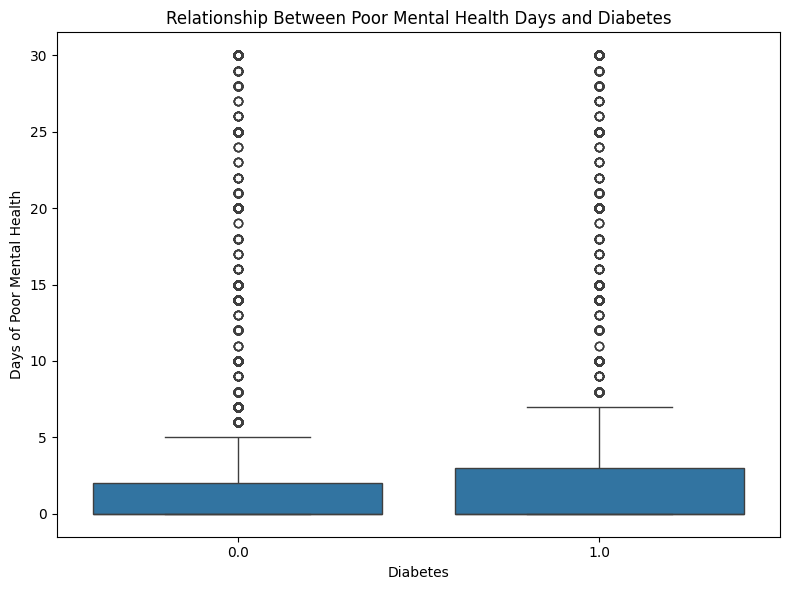

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diabetes', y='MentHlth', data=df)
plt.title('Relationship Between Poor Mental Health Days and Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Days of Poor Mental Health')
plt.tight_layout()
plt.show()


Il grafico mette a confronto il numero di giorni, nell’ultimo mese, in cui le persone riportano uno stato di salute mentale “scarso” (da 0 a 30) a seconda della presenza o meno di diabete. Si nota che chi convive con il diabete ha una mediana più alta (intorno a 1 giorno di “cattivo” stato mentale, contro 0 per i non diabetici) e un IQR più ampio (il 25°-75° percentile arriva a toccare circa 3 giorni), mentre tra i non diabetici la maggior parte dichiara 0-1 giorni di disagio mentale. Inoltre, nel gruppo diabetico emergono più outlier con picchi anche fino a 30 giorni, segno di una maggiore variabilità e di esperienze più estreme di malessere psicologico. In sintesi, chi ha il diabete tende a vivere più frequentemente e con ampia dispersione periodi di salute mentale compromessa.


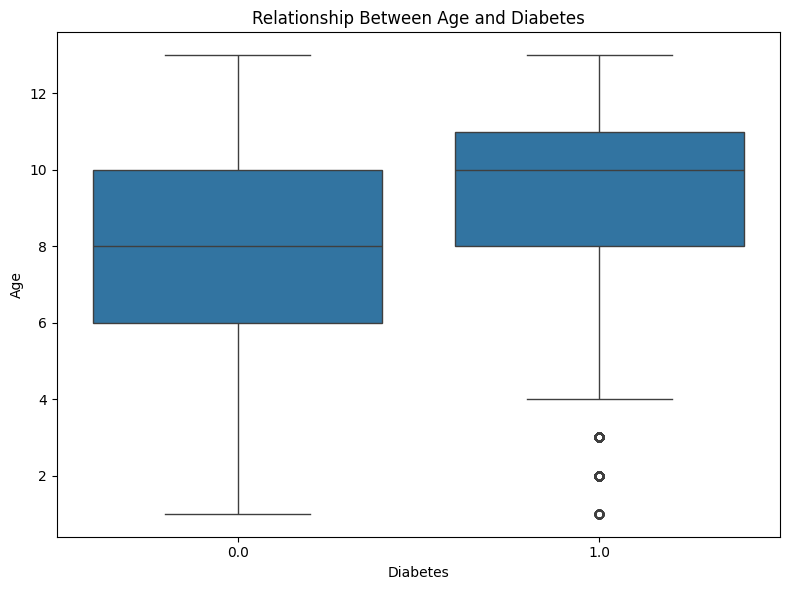

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diabetes', y='Age', data=df)
plt.title('Relationship Between Age and Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


Anche in questo caso emerge uno spostamento netto verso destra: chi ha il diabete appartiene mediamente a fasce d’età più avanzate rispetto ai non diabetici. La mediana per il gruppo diabetico si colloca intorno al valore 10 (che corrisponde a età superiori alla mezza età), mentre nei non diabetici è intorno a 8 (età più giovane). L’intervallo interquartile dei diabetici va da circa 8 a 11, mostrando una concentrazione in età adulte e anziane, e le code arrivano fino a categorie ancora più elevate; nei non diabetici, invece, l’IQR rimane più basso e compatto, con pochi outlier nella fascia più alta e alcuni in quella più bassa. In sintesi, il diabete è molto più frequente nelle persone di età avanzata.


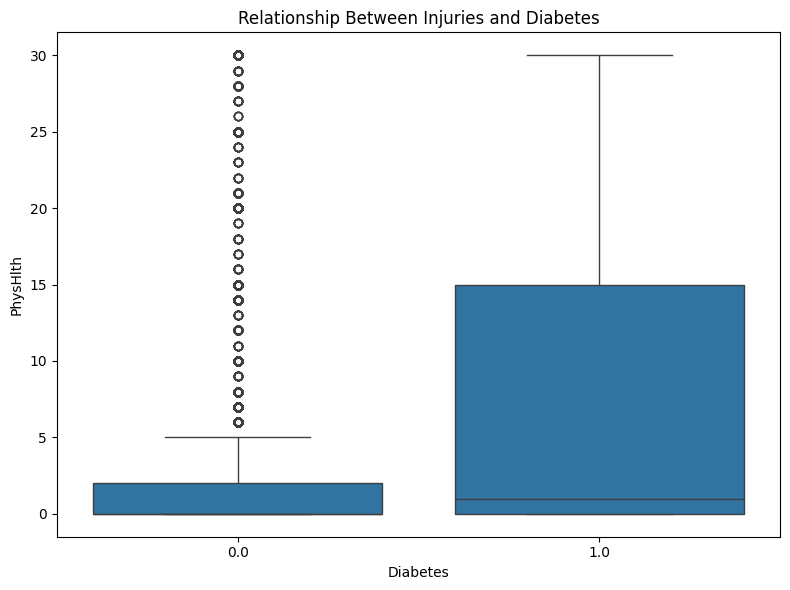

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diabetes', y='PhysHlth', data=df)
plt.title('Relationship Between Injuries and Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('PhysHlth')
plt.tight_layout()
plt.show()


I non-diabetici hanno una mediana di giorni con problemi fisici vicina allo zero (la maggior parte segna 0-2 giorni, con qualche raro outlier fino a 30), mentre nei diabetici la mediana si sposta molto più in alto (intorno a 15 giorni) e il range interquartile copre valori ben più alti. In pratica chi convive con il diabete lamenta con molta più frequenza periodi di salute fisica compromessa nell’ultimo mese, e la variabilità dei giorni di disagio è decisamente maggiore.

### Correlazione fra tutti i range di Età e Diabete

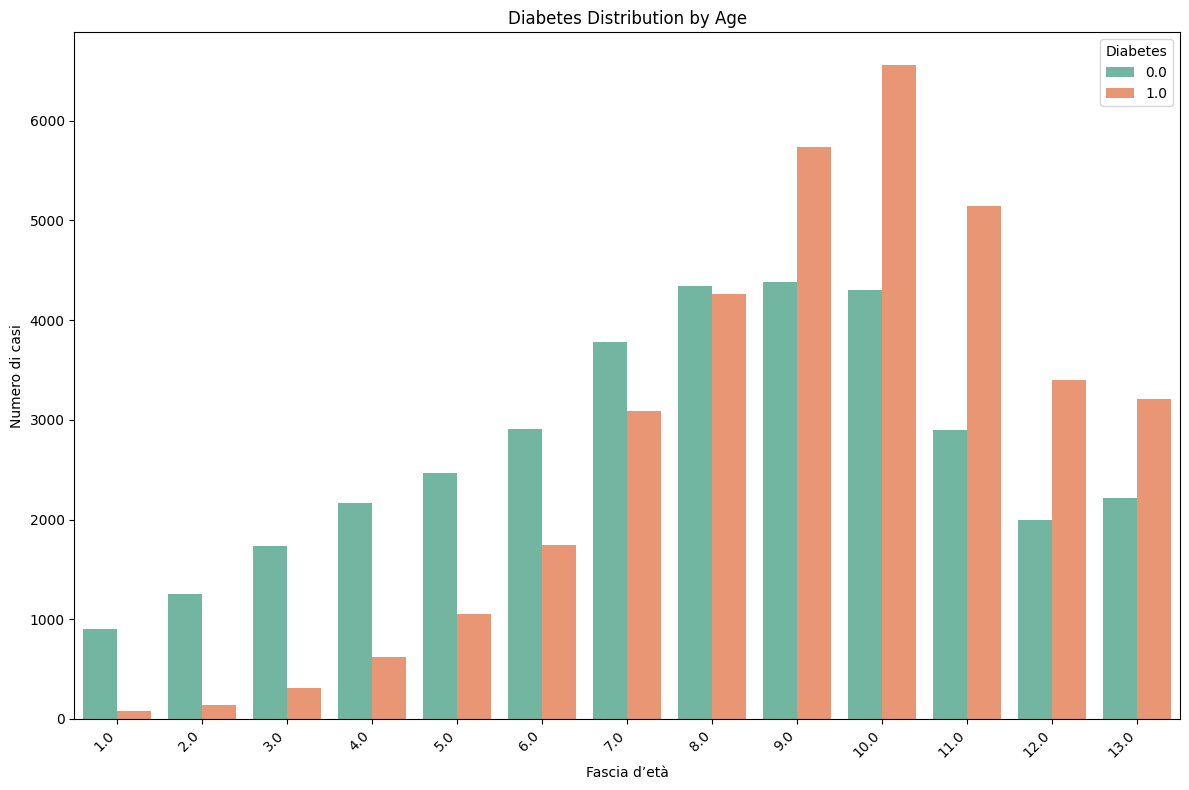

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.countplot(
    x='Age',
    hue='Diabetes',
    data=df, # Pass the entire DataFrame
    order=sorted(df['Age'].unique()), # Order the x-axis by age
    palette="Set2"
)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Fascia d’età')
plt.ylabel('Numero di casi')
plt.title('Diabetes Distribution by Age')
plt.tight_layout()
plt.show()


Considerando che nel dataset l'età delle persone è categorizzata come:

| Numero | Fascia d'età      |
| ------ | ----------------- |
| 1      | Age 18 to 24      |
| 2      | Age 25 to 29      |
| 3      | Age 30 to 34      |
| 4      | Age 35 to 39      |
| 5      | Age 40 to 44      |
| 6      | Age 45 to 49      |
| 7      | Age 50 to 54      |
| 8      | Age 55 to 59      |
| 9      | Age 60 to 64      |
| 10     | Age 65 to 69      |
| 11     | Age 70 to 74      |
| 12     | Age 75 to 79      |
| 13     | Age 80 or older   |

Dal seguente grafico capiamo che tra i più giovani (18-49 anni) i casi senza diabete sono molto più frequenti, ma a partire dalla fascia 50-54 anni la curva dei diabetici cresce rapidamente e si incrocia con quella dei non diabetici; il picco si osserva tra i 65 e i 69 anni, dopodiché i casi diabetici calano leggermente ma restano comunque superiori a quelli non diabetici anche nelle fasce più anziane.


# Features Engineering

Dalle anaisi precedenti le features `PhysActivity`, `MentHlth` e `Stroke` non sembrano fortemente correlate al diabete.

In particolare `PhysActivity` è binaria e indica solamente se una persona ha fatto attività fisica alemno una volta negli ultimi 30 giorni, e considerando che, seppur una mancanza di esercizio fisico possa influenzare la comparsa del diabete, questa feature è troppo generica. Mentre per la feature `MentHlth` che indica i giorni di cattiva salute mentale riportati dalle persone, sembra essere più una conseguenza del diabete, piuttosto che una causa.
La feature `Stroke` è 1 se la persona ha mai avuto almeno un infarto in tutta la sua vita, ed anche questa varibile è troppo genrica per predire il diabete.

Decido quindi di eliminare queste tre featurs.


In [ ]:
df = df.drop(['PhysActivity', 'MentHlth', 'Stroke'], axis=1)

Poi separo le **Features** dal **Target**:

In [ ]:
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=42, stratify=y.values)


In [ ]:
from statsmodels.stats.proportion import proportion_confint

def confidence_interval(instance, acc, confidence):
    return proportion_confint(instance * acc, instance, 1-confidence/100, method='wilson')


In [ ]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


## Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Perceptron with standard scaler
std_perceptron = Pipeline([
    ('std', StandardScaler()),
    ('perceptron', Perceptron(max_iter=8000, tol=1e-3, early_stopping=True, alpha=0.0001, n_jobs=-1))
])

std_perceptron.fit(X_train, y_train)
print('Accuracy on train {:.2f}%'.format(std_perceptron.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(std_perceptron.score(X_val, y_val)*100))


Accuracy on train 69.66%
Accuracy on val 69.12%


In [ ]:
# from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

std_perceptron = Pipeline([
    ('std', StandardScaler()),
    ('perceptron', Perceptron(n_jobs=-1, early_stopping=True, n_iter_no_change=5))
])

parameters = {
    'std': [None, StandardScaler()],
    'perceptron__penalty': [None, 'l1', 'l2', 'elasticnet'],
    'perceptron__alpha': [0.0001, 0.001, 0.01, 1], # lambda for L1/L2
    'perceptron__tol': [1e-9, 1e-6, 1e-3, 1, 1e3, 1e6],
}

perceptron_cv = GridSearchCV(std_perceptron, parameters, cv=5, n_jobs=-1, scoring='f1')
perceptron_cv.fit(X_train, y_train)
print('GridSearch on Perceptron finish')


GridSearch on Perceptron finish


In [ ]:
print('Best parameters:', perceptron_cv.best_params_)
print('Best score: {:.4f}%'.format(round(perceptron_cv.best_score_ * 100, 4)))

Best parameters: {'perceptron__alpha': 0.01, 'perceptron__penalty': 'l1', 'perceptron__tol': 1e-09, 'std': None}
Best score: 71.4146%


In [ ]:
confidence = 95
lower, upper = confidence_interval(len(X_train), perceptron_cv.score(X_val, y_val), confidence)

print('Interval with confidence {}%: \nPmin = {:.4f}%\nPmax = {:.4f}%'.format(confidence, lower*100, upper*100))


Interval with confidence 95%: 
Pmin = 70.7200%
Pmax = 71.5185%


<Axes: >

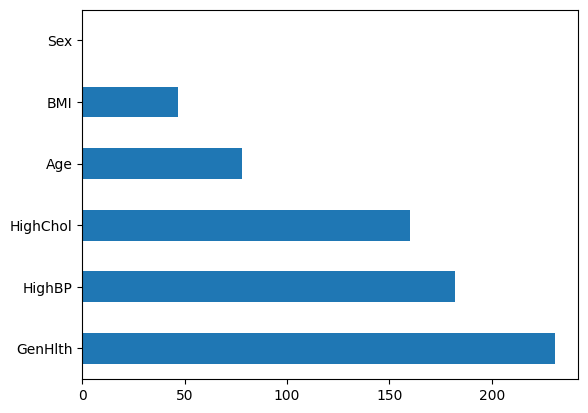

In [ ]:
pc_imp = pd.Series(perceptron_cv.best_estimator_[1].coef_[0], index=X_train.columns)
pc_imp.nlargest(6).plot(kind='barh')


Questo grafico mostra l’importanza relativa di sei variabili nel predire la presenza di diabete all’interno di un semplice classificatore lineare (perceptron). In cima troviamo la voce “GenHlth” (stato di salute percepito), a cui è assegnato il peso più alto: significa che la valutazione soggettiva della propria salute gioca il ruolo più determinante nel riconoscere un quadro diabetico. Seguono “HighBP” (ipertensione) e “HighChol” (colesterolo elevato), entrambe condizioni comuni che accompagnano spesso il diabete, mentre “Age” e “BMI” contribuiscono in misura minore ma comunque significativa, indicando che età avanzata e indice di massa corporea elevato aumentano il rischio. Infine “Sex” ha quasi peso zero, segno che, in questo modello, il genere non è un fattore discriminante per la diagnosi di diabete.


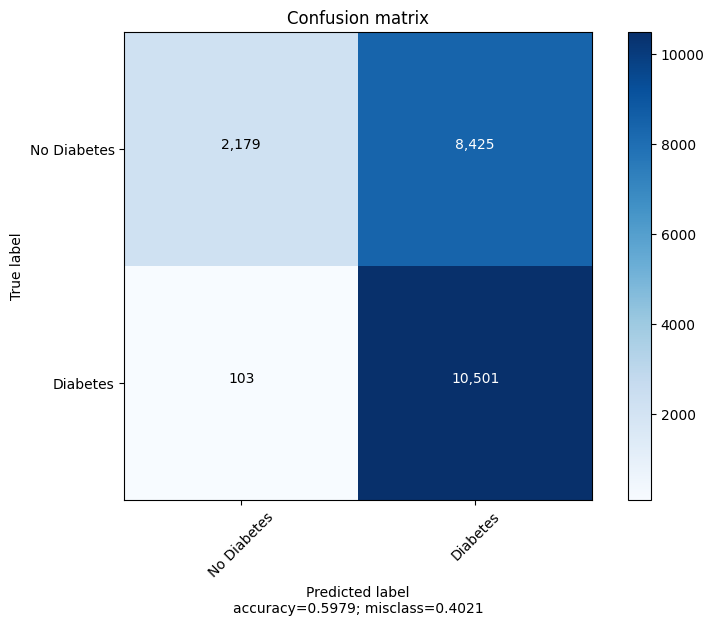

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = perceptron_cv.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

plot_confusion_matrix(cm, target_names=['No Diabetes', 'Diabetes'], normalize=False)


In [ ]:
pred = perceptron_cv.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

         0.0       0.95      0.21      0.34     10604
         1.0       0.55      0.99      0.71     10604

    accuracy                           0.60     21208
   macro avg       0.75      0.60      0.52     21208
weighted avg       0.75      0.60      0.52     21208



In [ ]:
from sklearn.metrics import mean_squared_error

perc_mse = mean_squared_error(y_val, perceptron_cv.predict(X_val))
print('MSE: {}'.format(perc_mse))

MSE: 0.4021124104111656


### Perceptron with Polynomial features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_perceptron = Pipeline([
    ('std', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('perceptron', Perceptron(n_jobs=-1, early_stopping=True, n_iter_no_change=5))
])

parameters = {
    'std': [None, StandardScaler()],
    'perceptron__penalty': ['l1', 'l2'],
    'perceptron__alpha': [0.0001, 0.001, 0.01], # lambda L1/L2
    'perceptron__tol': [1e-9, 1e-6, 1e-3, 1],
}

poly_perceptron_cv = GridSearchCV(poly_perceptron, parameters, cv=5, n_jobs=-1, return_train_score=True, scoring='f1')
poly_perceptron_cv.fit(X_train, y_train)
print('GridSearch on Perceptron finish')


GridSearch on Perceptron finish


In [ ]:
print('Best parameters: ', poly_perceptron_cv.best_params_)
print('Best score: {:.4f}%'.format(round(poly_perceptron_cv.best_score_ * 100, 4)))

Best parameters:  {'perceptron__alpha': 0.01, 'perceptron__penalty': 'l1', 'perceptron__tol': 1e-09, 'std': None}
Best score: 70.4794%


In [ ]:
confidence = 95
lower, upper = confidence_interval(len(X_val), poly_perceptron_cv.score(X_val, y_val), confidence)

print('Interval with confidence {}%: \nPmin = {:.4f}%\nPmax = {:.4f}%'.format(confidence, lower*100, upper*100))


Interval with confidence 95%: 
Pmin = 72.2042%
Pmax = 73.4018%


<Axes: >

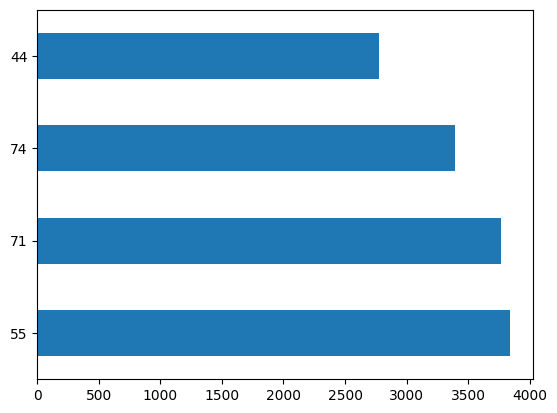

In [ ]:
pc_imp = pd.Series(poly_perceptron_cv.best_estimator_[2].coef_[0])
pc_imp.nlargest(4).plot(kind='barh')

In [ ]:
best = poly_perceptron_cv.best_estimator_

poly = best.named_steps['poly']
scaler = best.named_steps['std']

expanded_names = poly.get_feature_names_out(poly.feature_names_in_)

for i in [44, 74, 71, 55]:
    print(i, expanded_names[i])


44 HighChol BMI
74 BMI HighBP
71 BMI GenHlth
55 CholCheck BMI


Il perceptron polinomiale sfrutta soprattutto i termini non lineari che coinvolgono il BMI e alcuni indicatori di salute: il peso più alto è assegnato al prodotto tra il quadrato del BMI e l’autovalutazione della salute generale (BMI² - GenHlth), a seguire compare il termine BMI·HighBP (presenza di ipertensione), poi l’interazione tra controllo del colesterolo, BMI e numero di giorni di cattiva salute mentale (HighChol·BMI·MentHlth) e infine il prodotto tra controllo del colesterolo e il quadrato del BMI (HighChol·BMI²). In pratica, il modello basa la sua decisione soprattutto sulla combinazione di un BMI elevato con segnali di salute compromessa (cattiva autovalutazione, ipertensione o problemi di salute mentale), mentre le variabili isolate o lineari contano molto meno.


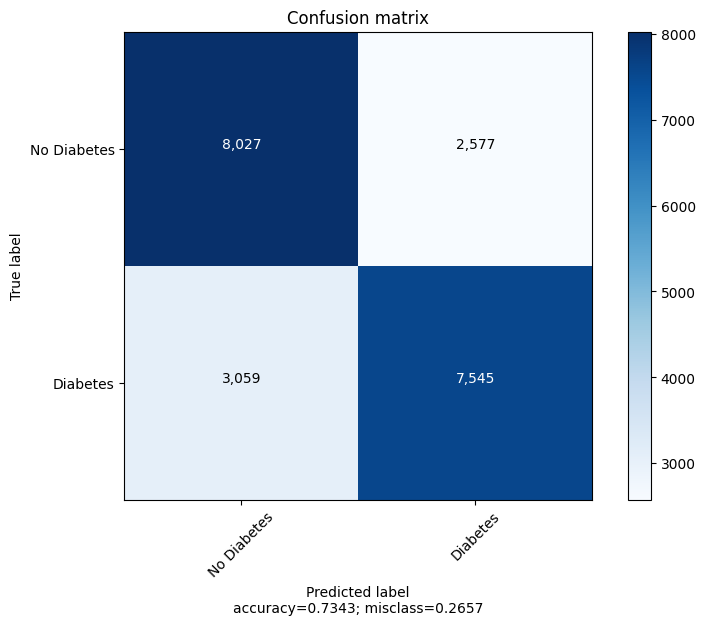

In [ ]:
y_pred = poly_perceptron_cv.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

plot_confusion_matrix(cm, target_names=['No Diabetes', 'Diabetes'], normalize=False)


In [ ]:
pred = poly_perceptron_cv.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

         0.0       0.72      0.76      0.74     10604
         1.0       0.75      0.71      0.73     10604

    accuracy                           0.73     21208
   macro avg       0.73      0.73      0.73     21208
weighted avg       0.73      0.73      0.73     21208



In [ ]:
from sklearn.metrics import mean_squared_error

poly_mse = mean_squared_error(y_val, poly_perceptron_cv.predict(X_val))
print('MSE: {}'.format(poly_mse))


MSE: 0.2657487740475292


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

std_lr = Pipeline([
    ('std', StandardScaler()),
    ('lr', LogisticRegression(dual=False))
])

parameters = {
    'lr__penalty': ['l1'],
    'lr__tol': [1e-9, 1e-6, 1e-3, 1e-2, 1e-1, 1],
    'lr__C': [1, 0.8, 0.3], # 1/lambda for L1/L2
    'lr__solver': ['liblinear']
}

lr_gs = GridSearchCV(std_lr, parameters, cv=5, n_jobs=-1, return_train_score=True, scoring='f1')
lr_gs.fit(X_train, y_train)
print("Grid search finish")


Grid search finish


In [ ]:
print('Best parameters:', lr_gs.best_params_)
print('Best train score: {:.4f}%\nBest validation score: {:.4f}%'.format(round(lr_gs.best_score_ * 100, 4), round(lr_gs.score(X_val, y_val)*100, 4)))


Best parameters: {'lr__C': 0.8, 'lr__penalty': 'l1', 'lr__solver': 'liblinear', 'lr__tol': 0.01}
Best train score: 75.1748%
Best validation score: 75.4736%


In [ ]:
confidence = 95
lower, upper = confidence_interval(len(X_val), lr_gs.score(X_val, y_val), confidence)

print('Interval with confidence {}%: \nPmin = {:.4f}%\nPmax = {:.4f}%'.format(confidence, lower*100, upper*100))


Interval with confidence 95%: 
Pmin = 74.8900%
Pmax = 76.0480%


<Axes: >

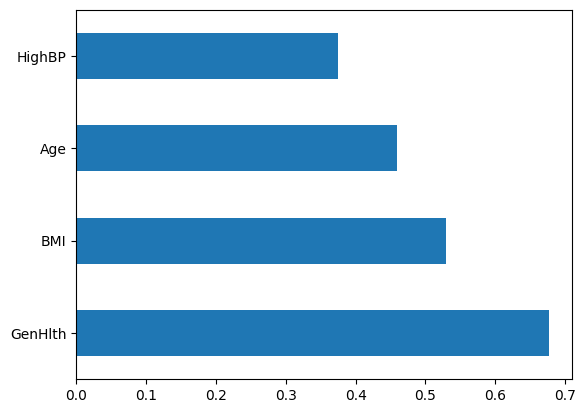

In [ ]:
lr_imp = pd.Series(lr_gs.best_estimator_[1].coef_[0], index=X_train.columns)
lr_imp.nlargest(4).plot(kind='barh')

Questo secondo grafico visualizza l’“importanza” (ossia i coefficienti) delle variabili selezionate da un modello di regressione logistica per prevedere il diabete. Anche qui lo stato di salute percepito (“GenHlth”) risulta il fattore più influente, seguito dall’indice di massa corporea (“BMI”), dall’età (“Age”) e infine dalla presenza di ipertensione (“HighBP”): valori positivi e decrescenti indicano che all’aumentare di ciascuna di queste misure cresce proporzionalmente la probabilità stimata di diabete.


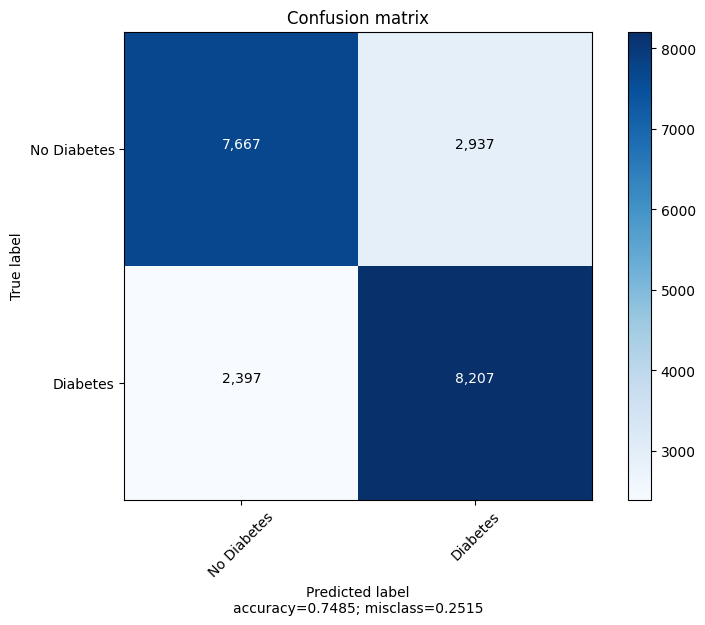

In [ ]:
y_pred = lr_gs.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
plot_confusion_matrix(cm, target_names=['No Diabetes', 'Diabetes'], normalize=False)


In [ ]:
pred = lr_gs.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74     10604
         1.0       0.74      0.77      0.75     10604

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



In [ ]:
from sklearn.metrics import mean_squared_error

lr_mse = mean_squared_error(y_val, lr_gs.predict(X_val))
print('MSE: {}'.format(lr_mse))

MSE: 0.251508864579404


# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

std_svm = Pipeline([
    ('std', StandardScaler()),
    ('svm', SVC())
])

parameters = {
    'svm__kernel': ['rbf'],
    'svm__C': [0.01, 0.1, 1],
}

svm_gs = GridSearchCV(std_svm, parameters, cv=3, n_jobs=-1, return_train_score=True, scoring='f1')
svm_gs.fit(X_train, y_train)
print('Finish SVM Grid Search')


Finish SVM Grid Search


In [ ]:
print('Best parameters:', svm_gs.best_params_)
print('Best train score: {:.4f}%\nBest validation score: {:.4f}%'.format(round(svm_gs.best_score_ * 100, 4), round(svm_gs.score(X_val, y_val)*100, 4)))


Best parameters: {'svm__C': 0.1, 'svm__kernel': 'rbf'}
Best train score: 76.1051%
Best validation score: 76.3780%


In [ ]:
confidence = 95
lower, upper = confidence_interval(len(X_val), svm_gs.score(X_val, y_val), confidence)

print('Interval with confidence {}%: \nPmin = {:.4f}%\nPmax = {:.4f}%'.format(confidence, lower*100, upper*100))


Interval with confidence 95%: 
Pmin = 75.8016%
Pmax = 76.9449%


<Axes: >

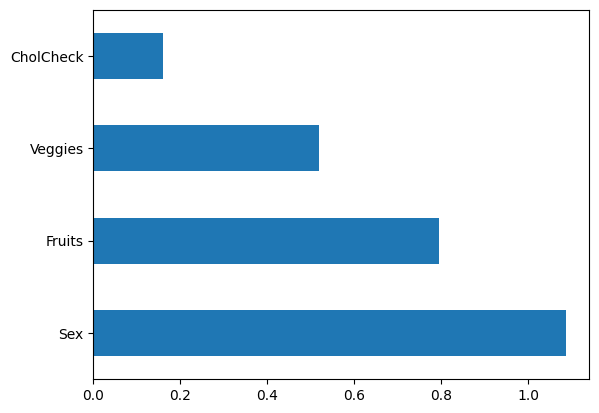

In [ ]:
svm_imp = pd.Series(svm_gs.best_estimator_[1].support_vectors_[0], index=X_train.columns)
svm_imp.nlargest(4).plot(kind='barh')


Qui la barra più alta corrisponde al coefficiente associato al sesso, il che significa che l’essere uomo o donna fornisce al modello il segnale più forte per distinguere i due gruppi. A seguire troviamo il consumo di frutta e poi quello di verdura, indicatori di abitudini alimentari che - pur con importanza decrescente - contribuiscono in maniera significativa alla classificazione. Infine il controllo del colesterolo (“CholCheck”) risulta quasi trascurabile: il suo coefficiente, molto vicino a zero, suggerisce che il semplice fatto di aver fatto o meno quel controllo non aggiunge quasi nulla al margine decisionale della SVM. In sintesi, questo grafico ci dice che nel kernel lineare il sesso e la dieta hanno un peso rilevante nel predire il diabete, mentre l’esame del colesterolo conta pochissimo.


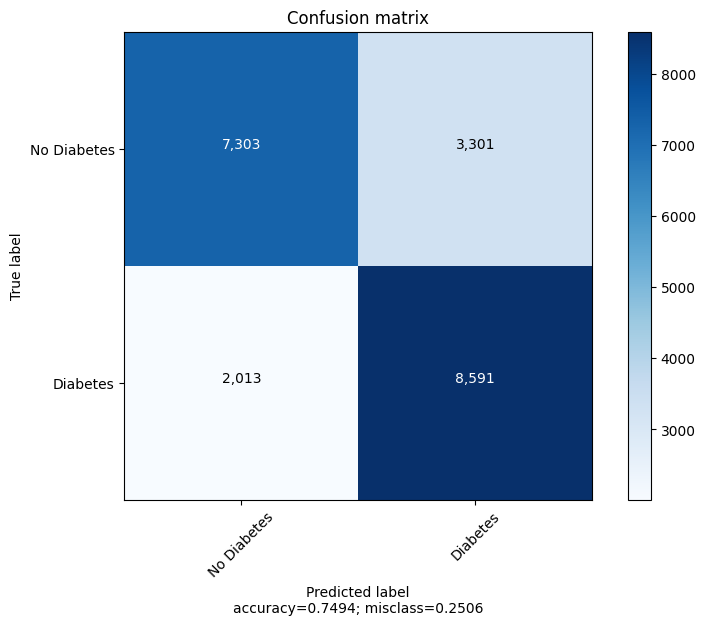

In [ ]:
y_pred = svm_gs.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

plot_confusion_matrix(cm, target_names=['No Diabetes', 'Diabetes'], normalize=False)


In [ ]:
pred = svm_gs.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73     10604
         1.0       0.72      0.81      0.76     10604

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



In [ ]:
from sklearn.metrics import mean_squared_error

svm_mse = mean_squared_error(y_val, svm_gs.predict(X_val))
print('MSE: {}'.format(svm_mse))


MSE: 0.2505658242172765


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc = Pipeline([
    ('std', StandardScaler()),
    ('rfc', RandomForestClassifier(n_jobs=-1, random_state=3))
])

parameters = {
    'rfc__n_estimators': [100, 200, 300], # numeri di alberi
    'rfc__max_depth': [2, 4, 6, 8, 10], # profondità di ogni albero
    'rfc__min_samples_leaf': [1, 2, 4], # numero minimo di campioni richiesti in un nodo foglia
    'rfc__min_samples_split': [2, 5, 10], # minimo di campioni richiesti per suddividere un nodo interno
}


rfc_gs = GridSearchCV(rfc, parameters, cv=5, n_jobs=-1, return_train_score=True, scoring='f1')
rfc_gs.fit(X_train, y_train)

print('Random Forest GridSearch finish')


Random Forest GridSearch finish


In [ ]:
print('Best parameters:', rfc_gs.best_params_)
print('Best train score: {:.4f}%\nBest validation score: {:.4f}%'.format(round(rfc_gs.best_score_ * 100, 4), round(rfc_gs.score(X_val, y_val)*100, 4)))


Best parameters: {'rfc__max_depth': 10, 'rfc__min_samples_leaf': 1, 'rfc__min_samples_split': 5, 'rfc__n_estimators': 300}
Best train score: 75.9456%
Best validation score: 76.3322%


In [ ]:
confidence = 95
lower, upper = confidence_interval(len(X_val), rfc_gs.score(X_val, y_val), confidence)

print('Interval with confidence {}%: \nPmin = {:.4f}%\nPmax = {:.4f}%'.format(confidence, lower*100, upper*100))


Interval with confidence 95%: 
Pmin = 75.7555%
Pmax = 76.8995%


<Axes: >

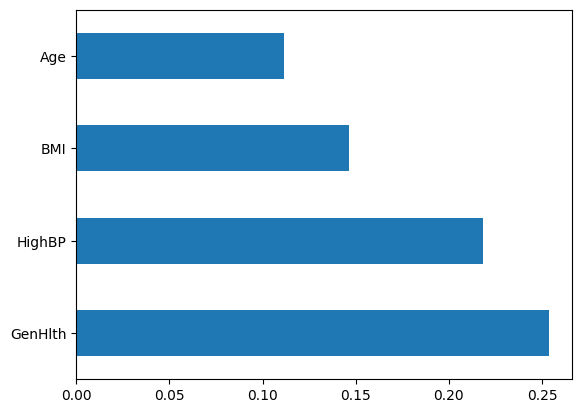

In [ ]:
rfc_imp = pd.Series(rfc_gs.best_estimator_[1].feature_importances_, index=X_train.columns)
rfc_imp.nlargest(4).plot(kind='barh')


Nel grafico delle importanze estratte dalla foresta casuale, “GenHlth” risulta il predittore più rilevante, il che significa che le suddivisioni sugli alberi basate sull’autovalutazione dello stato di salute sono quelle che in media riducono maggiormente l’impurezza del modello. Subito dopo compare “HighBP”, indicatore di ipertensione, la cui presenza guida anch’essa decisioni decisive nei nodi. Il BMI si colloca a un’importanza intermedia: pur essendo un buon marcatore di rischio, incide meno delle misure soggettive di salute e della pressione alta, mentre l’età, pur contribuendo, ha un ruolo tutto sommato minore. In sintesi, la random forest conferma che la percezione soggettiva del proprio stato di salute e l’ipertensione sono i fattori più discriminanti nella predizione del diabete, seguiti da BMI e infine dall’età.


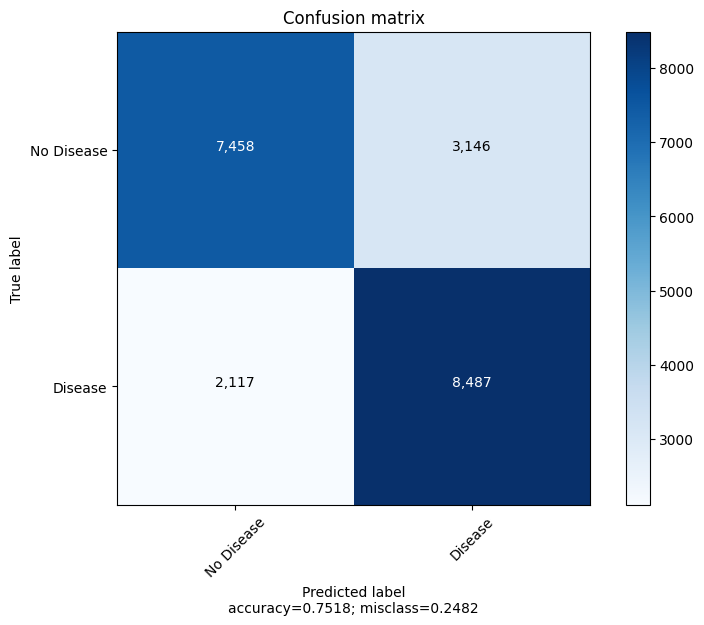

In [ ]:
y_pred = rfc_gs.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
plot_confusion_matrix(cm, target_names=['No Disease', 'Disease'], normalize=False)

In [ ]:
pred = rfc_gs.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74     10604
         1.0       0.73      0.80      0.76     10604

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



In [ ]:
from sklearn.metrics import mean_squared_error

rfc_mse = mean_squared_error(y_val, rfc_gs.predict(X_val))
print('MSE: {}'.format(rfc_mse))


MSE: 0.24816107129385137


# XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

std_xgb = Pipeline([
    ('std', StandardScaler()),
    ('xgb', XGBClassifier(nthread=8, objective='binary:logistic'))
])

parameters = {
    'xgb__eta': [0.002, 0.1, 0.5], # learning rate
    'xgb__max_depth': [6], # profondità massima di ciascun albero
    'xgb__n_estimators': [150, 300], # xgb__n_estimators
    'xgb__alpha': [0.0001, 0.001] # lambda di L1 sui pesi delle foglie
}

xgb_gs = GridSearchCV(std_xgb, parameters, cv=3, n_jobs=-1, return_train_score=True, scoring='accuracy')
xgb_gs.fit(X_train, y_train)
print("Grid Search Xgboost finish")


Grid Search Xgboost finish


In [ ]:
print('Best parameters:', xgb_gs.best_params_)
print('Best train score: {:.4f}%\nBest validation score: {:.4f}%'.format(round(xgb_gs.best_score_ * 100, 4), round(xgb_gs.score(X_val, y_val)*100, 4)))


Best parameters: {'xgb__alpha': 0.0001, 'xgb__eta': 0.1, 'xgb__max_depth': 6, 'xgb__n_estimators': 150}
Best train score: 74.8181%
Best validation score: 75.0330%


In [ ]:
confidence = 95
lower, upper = confidence_interval(len(X_val), xgb_gs.score(X_val, y_val), confidence)
print('Interval with confidence {}%: \nPmin = {:.4f}%\nPmax = {:.4f}%'.format(confidence, lower*100, upper*100))


Interval with confidence 95%: 
Pmin = 74.4460%
Pmax = 75.6110%


<Axes: >

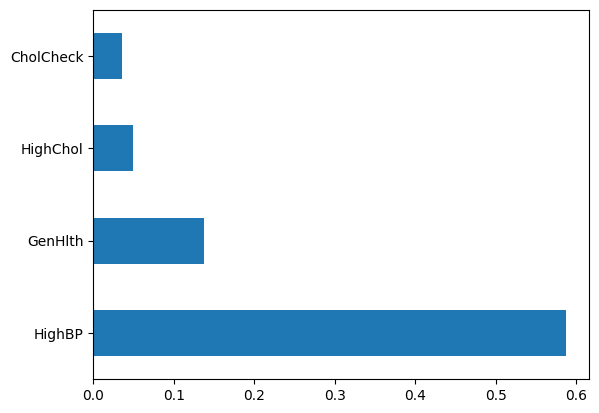

In [ ]:
from xgboost import plot_importance

xgb_imp = pd.Series(xgb_gs.best_estimator_[1].feature_importances_, index=X_train.columns)
xgb_imp.nlargest(4).plot(kind='barh')


Il grafico che diversamente dalla random forest, il fattore che influisce maggiormente sulle decisioni del modello è la presenza di ipertensione (“HighBP”), con un’importanza di gran lunga superiore a tutte le altre variabili. Al secondo posto si colloca l’autovalutazione dello stato di salute generale (“GenHlth”), che però pesa meno rispetto alla pressione alta. Più marginali risultano sia l’anamnesi di colesterolo elevato (“HighChol”), sia il semplice fatto di aver effettuato un controllo del colesterolo (“CholCheck”), quest’ultimo praticamente trascurabile. In sostanza, XGBoost punta quasi esclusivamente sulla combinazione tra pressione arteriosa e percezione soggettiva della salute, mentre gli indicatori legati al colesterolo giocano un ruolo molto secondario.


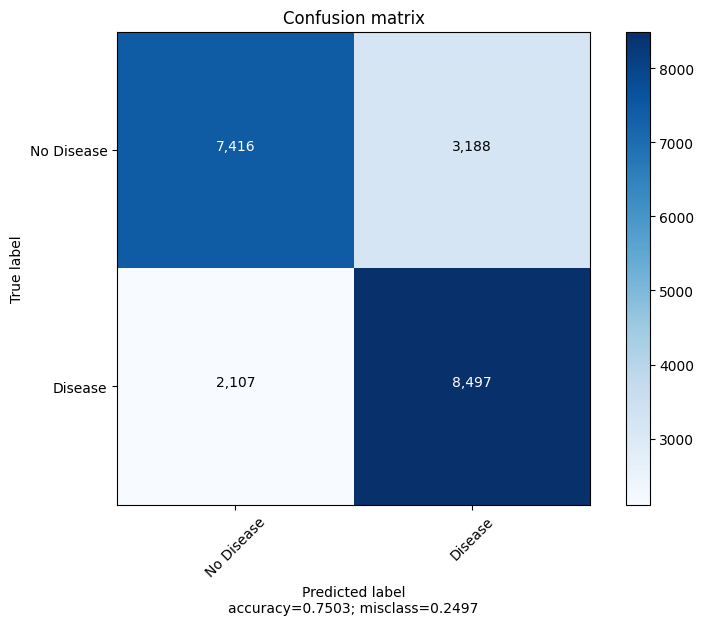

In [ ]:
y_pred = xgb_gs.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
plot_confusion_matrix(cm, target_names=['No Disease', 'Disease'], normalize=False)


In [ ]:
pred = xgb_gs.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74     10604
         1.0       0.73      0.80      0.76     10604

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



In [ ]:
from sklearn.metrics import mean_squared_error

xgb_mse = mean_squared_error(y_val, xgb_gs.predict(X_val))
print('MSE: {}'.format(xgb_mse))


MSE: 0.24966993587325537


# **Model Comparison**

In [ ]:
def model_comparison(mse_1, mse_2):
    d = np.abs(mse_1 - mse_2)
    variance = (mse_1 * (1 - mse_1)) / len(X_val) + (mse_2 * (1 - mse_2)) / len(X_val)
    d_min = d - 1.96 * np.sqrt(variance)
    d_max = d + 1.96 * np.sqrt(variance)
    return (d_min, d_max)


### XGBoost vs SVM

In [ ]:
print('Interval {}'.format(np.round(model_comparison(xgb_mse, svm_mse), 4)))

Interval [-0.0073  0.0091]


### XGBoost vs Perceptron

In [ ]:
print('Interval {}'.format(np.round(model_comparison(xgb_mse, perc_mse), 4)))

Interval [0.1436 0.1612]


### XGBoost vs Logistic Regression

In [ ]:
print('Interval {}'.format(np.round(model_comparison(xgb_mse, lr_mse), 4)))

Interval [-0.0064  0.0101]


### XGBoost vs Random Forest

In [ ]:
print('Interval {}'.format(np.round(model_comparison(xgb_mse, rfc_mse), 4)))

Interval [-0.0067  0.0097]


### Perceptron vs Logistic Regression

In [ ]:
print('Interval {}'.format(np.round(model_comparison(perc_mse, lr_mse), 4)))

Interval [0.1418 0.1594]


### Perceptron vs Random Forest

In [ ]:
print('Interval {}'.format(np.round(model_comparison(perc_mse, rfc_mse), 4)))

Interval [0.1452 0.1627]


## Confronti tra modelli

1. **XGBoost vs SVM**  
   - $$[-0.0073,\;0.0091]$$  
   - Contiene 0 ⇒ nessuna differenza significativa.

2. **XGBoost vs Perceptron**  
   - $$[-0.1612,\;-0.1436]$$  
   - XGBoost è significativamente **migliore** del Perceptron.

3. **XGBoost vs Logistic Regression**  
   - $$[-0.0064,\;0.0101]$$  
   - Contiene 0 ⇒ nessuna differenza significativa.

4. **XGBoost vs Random Forest**  
   - $$[-0.0067,\;0.0097]$$  
   - Contiene 0 ⇒ nessuna differenza significativa.

5. **Perceptron vs Logistic Regression**  
   - $$[0.1418,\;0.1594]$$  
   - Il Perceptron è significativamente **peggiore** della Logistic Regression.

6. **Perceptron vs Random Forest**  
   - $$[0.1452,\;0.1627]$$
   - Il Perceptron è significativamente **peggiore** della Random Forest.

---

## Sintesi

- **XGBoost, SVM, Logistic Regression e Random Forest** non mostrano differenze di MSE statisticamente significative tra di loro.  
- Il **Perceptron standard** ha un MSE **significativamente più elevato** rispetto a **tutti** gli altri modelli.  
- **XGBoost** risulta **migliore** del Perceptron (MSE più basso) con evidenza statistica.  


# **Model serialization**

In [ ]:
import os
import pickle

if not os.path.exists('models'):
    os.mkdir('models')

#XGB
model_serialize = open("models/xgb-model.mdl", 'wb')
pickle.dump(xgb_gs, model_serialize)
model_serialize.close()

#Logistic Regression
model_serialize = open("models/lr-model.mdl", 'wb')
pickle.dump(lr_gs, model_serialize)
model_serialize.close()

#SVM
model_serialize = open("models/svm-model.mdl", 'wb')
pickle.dump(svm_gs, model_serialize)
model_serialize.close()

#Random Forest
model_serialize = open("models/rf-model.mdl", 'wb')
pickle.dump(rfc_gs, model_serialize)
model_serialize.close()

#Percepron
model_serialize = open("models/pct-model.mdl", 'wb')
pickle.dump(perceptron_cv, model_serialize)
model_serialize.close()


# **Neural Network**

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
    plt.ylim([0,1])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
    plt.ylim([0.4, 1])
    plt.legend()
    plt.show()


In [ ]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

print(keras.__version__)
print(tf.__version__)

scaler_X = StandardScaler()
std_X_train = scaler_X.fit_transform(X_train.astype(float))
std_X_val = scaler_X.transform(X_val)

# Use the original y_train and y_val which are already 0 or 1
std_y_train = y_train
std_y_val = y_val

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print()
        print('.', end='')

# Modified recall_m to cast y_true to float32
def recall_m(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32) # Cast y_true to float32
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

# Modified precision_m to cast y_true to float32
def precision_m(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32) # Cast y_true to float32
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

# f1_score remains the same as it calls the modified precision_m and recall_m
def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def nn_build_model():
    model = Sequential([
        keras.Input(shape=[X_train.shape[1]]),
        Dense(64, kernel_initializer='random_uniform', activation=tf.nn.relu),
        Dropout(0.5),
        Dense(64, kernel_initializer='random_uniform', activation=tf.nn.relu),
        Dropout(0.5),
        Dense(64, kernel_initializer='random_uniform', activation=tf.nn.relu),
        Dropout(0.5),
        Dense(64, kernel_initializer='random_uniform', activation=tf.nn.relu),
        Dropout(0.5),
        Dense(1, kernel_initializer='random_uniform', activation=tf.nn.sigmoid)
    ])

    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', f1_score])
    return model


3.8.0
2.18.0


In [ ]:
from keras.callbacks import ModelCheckpoint
import os
import joblib

if not os.path.exists('models'):
    os.mkdir('models')

# Definisco il callback che salva solo il modello con val_loss minimo
checkpoint_cb = ModelCheckpoint(
    filepath='models/best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=0
)

model = nn_build_model()

model.summary()

history = model.fit(
    std_X_train, y_train,
    validation_split=0.3,
    batch_size=64,
    epochs=200,
    verbose=0,
    callbacks=[PrintDot(), checkpoint_cb]
)

joblib.dump(scaler_X, 'models/scaler_X.pkl')

# Test
p_train = model.predict(std_X_train, batch_size=1024).ravel()
print('min:', p_train.min(), 'max:', p_train.max(),
      'mean:', p_train.mean(), '>=0.5:', (p_train >= 0.5).mean())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,505 (52.75 KB)

 Trainable params: 13,505 (52.75 KB)

 Non-trainable params: 0 (0.00 B)


....................................................................................................
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
min: 1.8335825e-06 max: 0.99990535 mean: 0.53635216 >=0.5: 0.5843302885781263


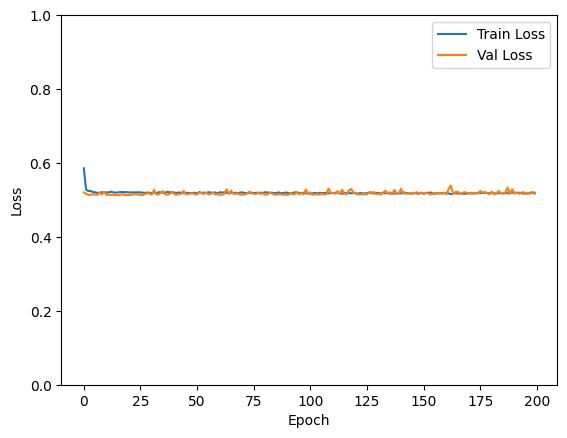

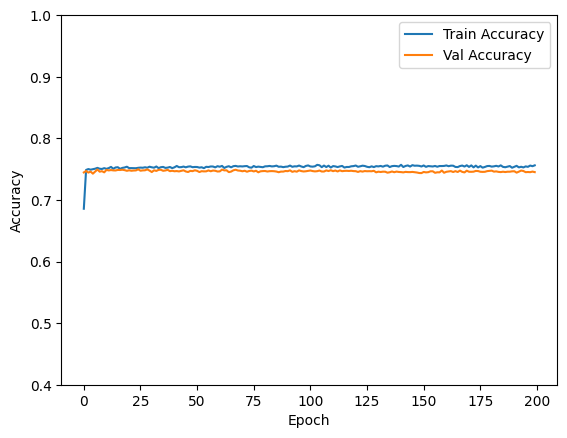

In [ ]:
hist = pd.DataFrame(history.history)
plot_history(history)

In [ ]:
model.evaluate(scaler_X.transform(X_val), y_val, batch_size=64)

332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7464 - f1_score: 34.0129 - loss: 0.5180


[0.515119194984436, 0.7506129741668701, 34.35860061645508]

In [ ]:
y_pred = model.predict(scaler_X.transform(X_val))
y_pred =(y_pred > 0.5)

663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


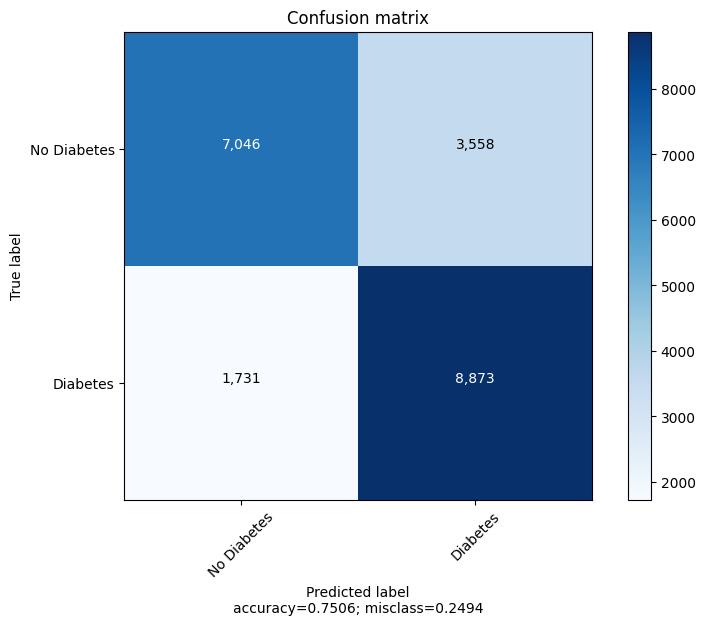

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
plot_confusion_matrix(cm, target_names=['No Diabetes', 'Diabetes'], normalize=False)


In [ ]:
from sklearn.metrics import classification_report
pred = model.predict(scaler_X.transform(X_val))
pred = (pred > 0.5)
print(classification_report(y_val, pred))


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

         0.0       0.80      0.66      0.73     10604
         1.0       0.71      0.84      0.77     10604

    accuracy                           0.75     21208
   macro avg       0.76      0.75      0.75     21208
weighted avg       0.76      0.75      0.75     21208



## **Save Neaural Network Model**

In [ ]:
model.save('models/nn-model.keras')

# ===== **WEB APP with FLASK** =====


In questa sezione, andiamo ad avviare l'App Web per predire il diabete.
Nell'interfaccia web verrano chieste all'utenti tutte le features usate per addestrare il modello.
La parte backend sarà ovviamente gestita da Python, quindi userò flask.
Per avviare l'app bisogna inanzitutto essere su una macchina locale (non Colab o simili) e assicurarsi che il file `predict.py` e la cartella `templates` (con all'interno `index.html`) siano nella stessa cartella di questo notebook, se si avvia il server locale da qui.

Per avviare il server, bisogna infatti impostare due varibili globali, `FLASK_APP="predict"` e `FLASK_DEBUG="1"` ed eseguire:
`python -m flask run`

Per avviarlo da qui, esegui le due celle sottostanti:


In [2]:
import os
os.environ["FLASK_APP"] = "predict"
os.environ["FLASK_DEBUG"] = "1"

In [3]:
!python -m flask run

^C


**La cella appena eseguita avvia il server e rimane attiva finchè non interrotta a mano. Per interromperla** (ed interrompere anche il server) **seleziona `Interrupt Kernel`**.

Per accedere all'app vai al link:

http://127.0.0.1:5000/
